# Modifications de résultats des sondages

## Import préliminaires des librairies

In [1]:
%pylab inline
# Command OS
import os

# Regex
import re

# Calcul and data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import norm
# Dealing with specific representation of number
# Aka commat in french in numbers
import locale
from locale import atof

### Dark theme pour matplotlib ###
from ing_theme_matplotlib import mpl_style
mpl_style(dark=True)

# Perso
from importlib.machinery import SourceFileLoader
tools = SourceFileLoader('methods', '../methods.py').load_module()
from methods import *


Populating the interactive namespace from numpy and matplotlib


## Import du dataframe

In [2]:
filenames=[f.rstrip('.p') for f in os.listdir('data')]
sum_in_margin=0
total_lines=0
df=pd.read_pickle("data/2020-03-20.p")
data_f=pd.DataFrame(columns=df.columns)
for fn in filenames:
    df=pd.read_pickle("data/{}.p".format(fn))
    df.Base=df.Base.astype('float')
    df['Date']=fn
    data_f=pd.concat([data_f,df])
    in_margin,nb_lines=extract_in_margin(df['ST Favorable'],df['ST Défavorable'],df['Evolution ST Favorable'],df['Evolution ST Défavorable'],df.Base)
    sum_in_margin+=in_margin
    total_lines+=nb_lines
data_f.Date=data_f.Date.astype('datetime64')
print(sum_in_margin/total_lines)



D:\Programmes\Python3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Programmes\Python3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Programmes\Python3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Programmes\Python3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Programmes\Python3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
0.958013999760915
D:\Programmes\Python3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = geta

In [3]:
Nom ='Edouard PHILIPPE'
d_margin_err=True

data_f['Inexploitable Favorable']=error_in_margin(data_f['ST Favorable'],data_f["Base"],data_f['Evolution ST Favorable'],double_margin=d_margin_err)
data_f['Inexploitable Défavorable']=error_in_margin(data_f['ST Défavorable'],data_f["Base"],data_f['Evolution ST Défavorable'],double_margin=d_margin_err)
data_f['Erreur Th Favorable']=error_p(data_f['ST Favorable']/100,data_f["Base"])*100
data_f['Erreur Th Défavorable']=error_p(data_f['ST Défavorable']/100,data_f["Base"],)*100
data_f['Inexploitable Favorable'].value_counts()
data_f['Inexploitable Défavorable'].value_counts()
df_inex=pd.DataFrame()
df_inex['Résultats']=pd.concat([data_f['ST Favorable'],data_f['ST Défavorable']])
df_inex['Categorie']=pd.concat([data_f['Categorie'],data_f['Categorie']])
df_inex['Inexploitable']=pd.concat([data_f['Inexploitable Favorable'],data_f['Inexploitable Défavorable']])
df_inex['Nom']=pd.concat([data_f['Nom'],data_f['Nom']])
groupe=df_inex[df_inex.Categorie=='ENSEMBLE']

data_f[data_f.Nom==Nom]


D:\Programmes\Python3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable
0,Edouard PHILIPPE,ENSEMBLE,ENSEMBLE,971.0,1.8,19.9,21.7,32.9,39.7,72.6,5.7,-5.0,7.0,2018-12-08,False,False,2.592729,2.805369
1,Edouard PHILIPPE,Sexe,Homme,462.0,1.5,20.7,22.2,34.9,39.4,74.3,3.5,-9.6,9.3,2018-12-08,False,False,3.789670,3.984704
2,Edouard PHILIPPE,Sexe,Femme,509.0,2.1,19.2,21.3,31.2,39.9,71.1,7.6,-0.9,4.9,2018-12-08,True,False,3.556922,3.938047
3,Edouard PHILIPPE,Age,18 à 24 ans,103.0,2.0,24.7,26.7,33.2,27.9,61.1,12.2,4.2,1.1,2018-12-08,True,True,8.543682,9.415272
4,Edouard PHILIPPE,Age,25 à 34 ans,154.0,1.9,11.1,13.0,33.8,43.6,77.4,9.6,-10.5,15.4,2018-12-08,False,False,5.311620,6.605724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,Edouard PHILIPPE,VotePrésidentielle20171ertour,STNonexpr,252.0,6.3,35.7,42.0,20.4,14.4,34.8,23.2,-1.4,-3.9,2021-03-06,True,True,6.093888,5.881244
2376,Edouard PHILIPPE,VotePrésidentielle20172ndtour,EmmanuelMacron,416.0,24.3,43.0,67.3,17.3,6.3,23.6,9.1,1.4,-4.5,2021-03-06,True,True,4.508072,4.080488
2377,Edouard PHILIPPE,VotePrésidentielle20172ndtour,MarineLePen,214.0,10.4,35.3,45.7,21.6,23.8,45.4,8.9,8.3,-8.4,2021-03-06,False,False,6.674323,6.670731
2378,Edouard PHILIPPE,VotePrésidentielle20172ndtour,STExpr,630.0,19.5,40.4,60.0,18.7,12.3,31.0,9.0,3.7,-5.8,2021-03-06,True,False,3.825528,3.611530


## Inexploitable global

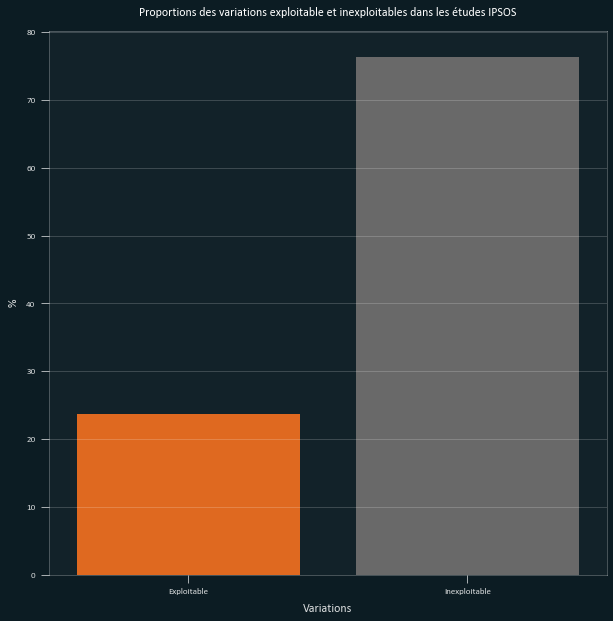

In [50]:
fig = plt.figure(figsize=(10,10))
ax=sns.barplot(x='Inexploitable', y='Inexploitable', data=df_inex, estimator=lambda x: len(x) / len(df_inex) * 100)
ax.set(ylabel="%")
ax.set(xlabel="Variations")
ax.set(title='Proportions des variations exploitable et inexploitables dans les études IPSOS')
ax.set(xticklabels=['Exploitable', 'Inexploitable'])
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

fig.savefig('plot.png',dpi=200)

In [5]:
print(df_inex.Inexploitable.value_counts())
df_inex.Inexploitable.value_counts()/len(df_inex)

True     59649
False    18471
Name: Inexploitable, dtype: int64


True     0.763556
False    0.236444
Name: Inexploitable, dtype: float64

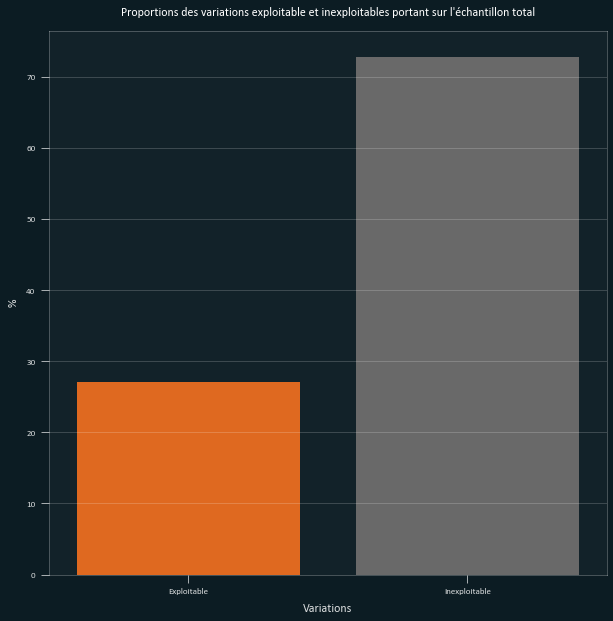

In [51]:
df_inex_ens=df_inex[df_inex.Categorie=='ENSEMBLE']
fig = plt.figure(figsize=(10,10))
ax=sns.barplot(x='Inexploitable', y='Inexploitable', data=df_inex_ens, estimator=lambda x: len(x) / len(df_inex_ens) * 100)
ax.set(ylabel="%")
ax.set(xlabel="Variations")
ax.set(title="Proportions des variations exploitable et inexploitables portant sur l'échantillon total")
ax.set(xticklabels=['Exploitable', 'Inexploitable'])
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
fig.savefig('plot.png',dpi=200)


In [7]:
print(df_inex_ens.Inexploitable.value_counts())
df_inex_ens.Inexploitable.value_counts()/len(df_inex_ens)

True     813
False    303
Name: Inexploitable, dtype: int64


True     0.728495
False    0.271505
Name: Inexploitable, dtype: float64

## Inexploitable sur groupe ENSEMBLE (seulement tous les sondés)

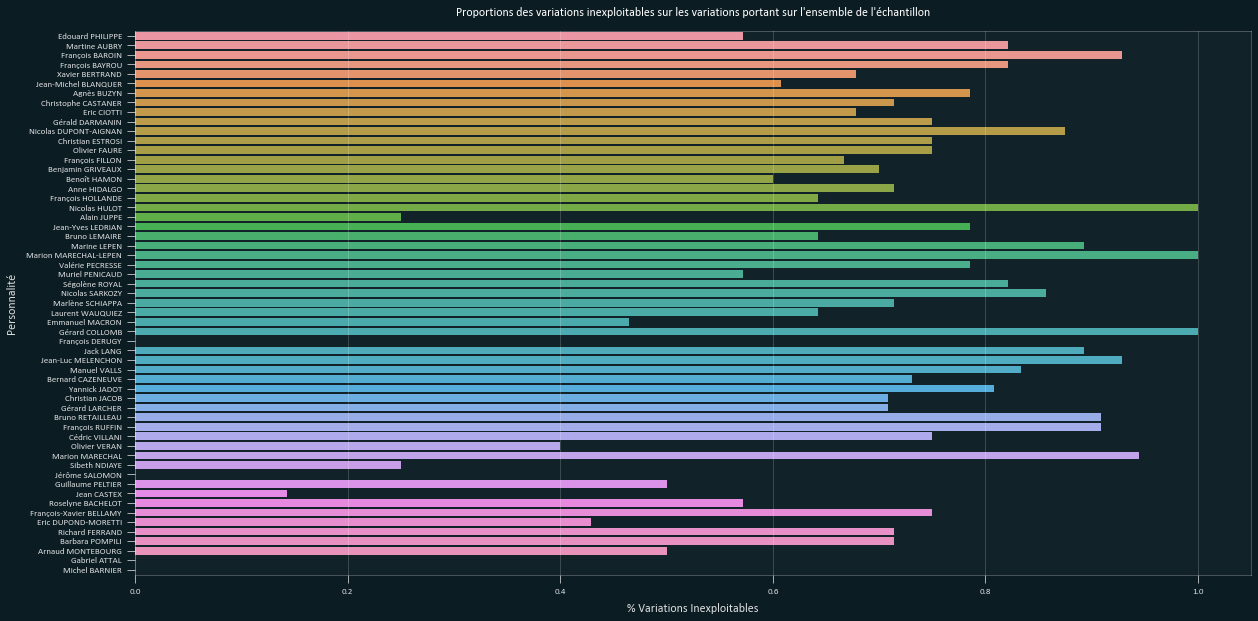

In [56]:
fig = plt.figure(figsize=(20,10))
ax=sns.barplot(x='Inexploitable',y='Nom',data=df_inex_ens,ci=None
#  ,estimator=lambda x: len(x) / len(df_inex[df_inex.Categorie=='ENSEMBLE']) * 100
)
ax.set(title="Proportions des variations inexploitables sur les variations portant sur l'ensemble de l'échantillon")
ax.set(xlabel="% Variations Inexploitables")
ax.set(ylabel="Personnalité ")
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

fig.savefig('plot.png',dpi=200)

In [9]:
print(df_inex_ens['Inexploitable'].value_counts()/len(groupe))
print(df_inex_ens['Inexploitable'].value_counts())
# data_f['Inexploitable Défavorable'].value_counts()

True     0.728495
False    0.271505
Name: Inexploitable, dtype: float64
True     813
False    303
Name: Inexploitable, dtype: int64


## Inexploitable sur toutes les variations

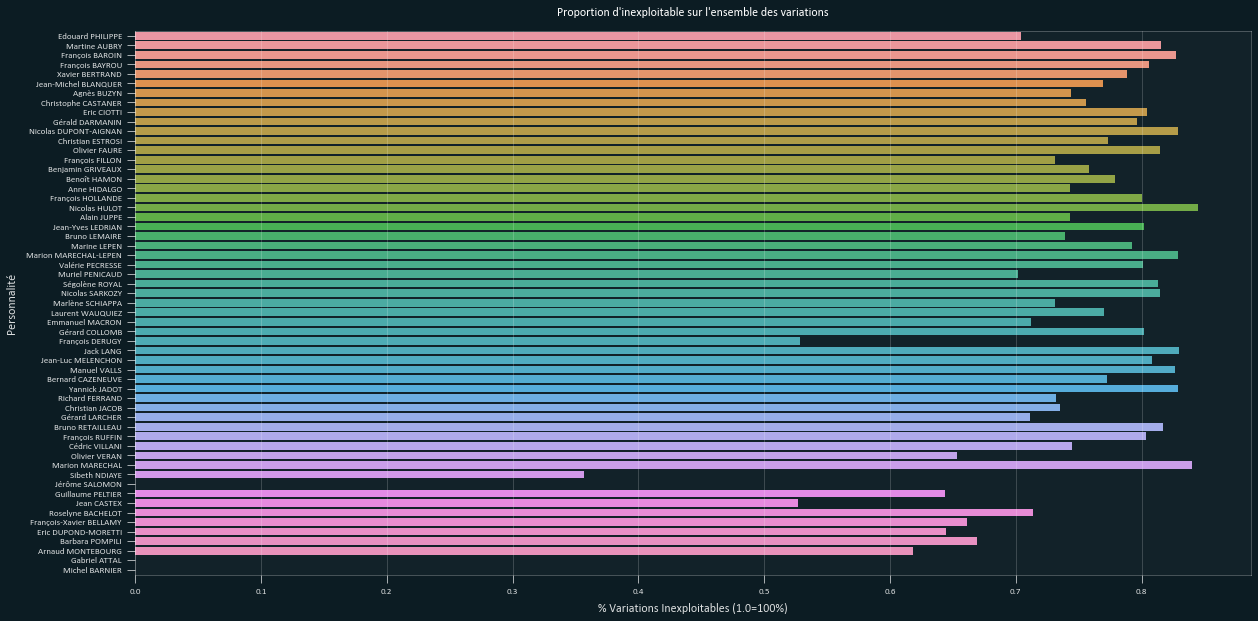

In [55]:
fig = plt.figure(figsize=(20,10))
ax=sns.barplot(x='Inexploitable',y='Nom',data=df_inex,ci=None\
#  ,estimator=lambda x: len(x) / len(df_inex[df_inex.Categorie=='ENSEMBLE']) * 100
)
ax.set(xlabel="% Variations Inexploitables (1.0=100%)")
ax.set(title="Proportion d'inexploitable sur l'ensemble des variations")
ax.set(ylabel="Personnalité ")
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

fig.savefig('plot.png',dpi=200)

In [11]:
print(df_inex['Inexploitable'].value_counts()/len(df_inex))
print(df_inex['Inexploitable'].value_counts())

True     0.763556
False    0.236444
Name: Inexploitable, dtype: float64
True     59649
False    18471
Name: Inexploitable, dtype: int64


## Taille échantillons groupes de gauche

In [12]:
data_f[data_f.Categorie=='Proximitépolitique'].Groupe.value_counts()

DLF                              558
RN                               558
EELV                             558
PS                               558
LR                               558
MoDem                            558
LREM                             558
UDI                              558
Aucunparti                       528
STFIPdGPC                        528
STCentre(ModemLREM)              528
STDroite(LRUDI)                  528
STGauche(FIPdGPCPSEELV)          528
Aucun parti                       30
ST Droite (LR UDI)                30
ST FI PdG PC                      30
ST Centre (Modem LREM)            30
ST Gauche (FI PdG PC PS EELV)     30
Name: Groupe, dtype: int64

In [13]:
filtre_soutien_gauche= (data_f.Groupe == 'PS') | (data_f.Groupe == 'EELV') | (data_f.Groupe == 'STFIPdGPC') # | (data_f.Groupe == 'STGauche(FIPdGPCPSEELV)') 
filtre_soutien_gauche_full= (data_f.Groupe == 'PS') | (data_f.Groupe == 'EELV') | (data_f.Groupe == 'STFIPdGPC')  | (data_f.Groupe == 'STGauche(FIPdGPCPSEELV)') 
taille_gauche_full=data_f[filtre_soutien_gauche_full][['Base','Date','Groupe']]
# test_df=taille_gauche_full=data_f[filtre_soutien_gauche_full][['Base','Date','Groupe']].pivot_table(values='Base',index=['Date'],columns=['Groupe'])
taille_gauche_detail=data_f[filtre_soutien_gauche][['Base','Date','Groupe']].pivot_table(values='Base',index=['Date'],columns=['Groupe'])
taille_gauche_detail.rename(columns={'STFIPdGPC':'FI-PdG-PC'}, inplace=True)
taille_gauche_detail=taille_gauche_detail[['FI-PdG-PC','PS','EELV']]
taille_gauche_full.replace('STFIPdGPC','FI-PdG-PC',inplace=True)
taille_gauche_full.replace('STGauche(FIPdGPCPSEELV)','Soutien Gauche (Total)',inplace=True)

### Plot stack

(0.0, 350.0)

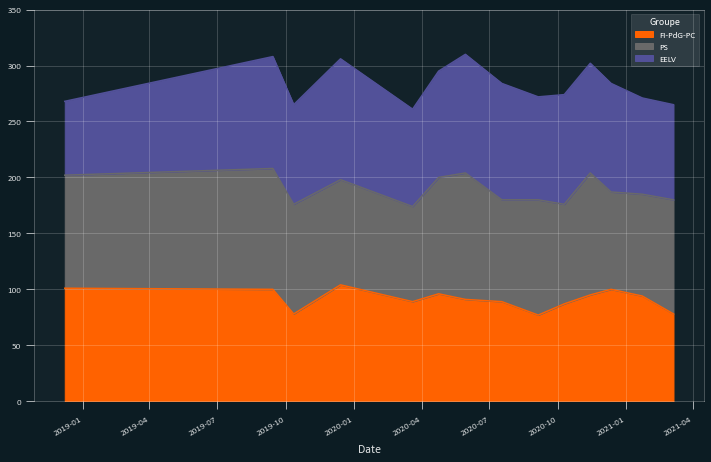

In [14]:

# fig = plt.figure(figsize=(12,8))
# ax=sns.lineplot(data=taille_gauche_detail,x='Date',y='Base',hue='Groupe')
# ax=sns.lineplot(data=taille_echantillon_gauche,x='Date',y='Base')

ax=taille_gauche_detail.plot.area(figsize=(12,8))
taille_gauche_detail
ax.set_ylim(0,350)

### Plot line

In [15]:
taille_gauche_full["Erreur"]=error_p(taille_gauche_full.Base/1000,1000)*1000


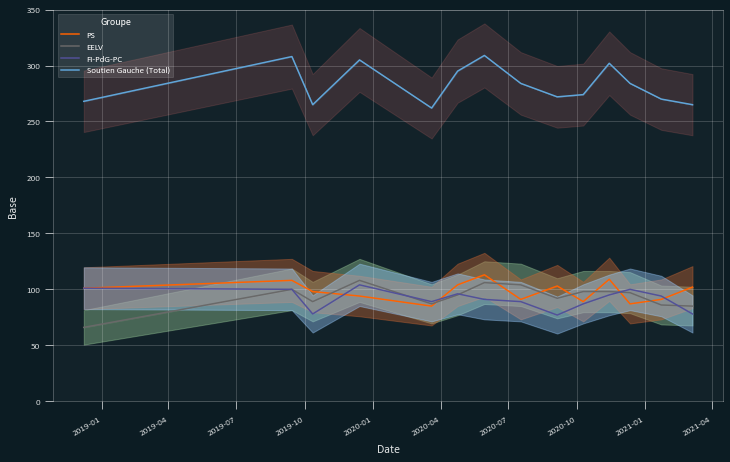

In [16]:
# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# years_fmt = mdates.DateFormatter('%m-%Y')

fig = plt.figure(figsize=(12,8))
# ax=sns.lineplot(data=taille_gauche_detail,x='Date',y='Base',hue='Groupe')
ax=sns.lineplot(data=taille_gauche_full,x='Date',y='Base',hue='Groupe',err_style='band')
ax.set_ylim(0,350)

# # format the ticks
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(years_fmt)
# # ax.xaxis.set_minor_locator(months)

# # round to nearest years.
# datemin = np.datetime64(taille_gauche_full.Date.min())
# datemax = np.datetime64(taille_gauche_full.Date.max())
# ax.set_xlim(datemin, datemax)
# ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# Organise date on ticks automatically
fig.autofmt_xdate()

total_gauche=taille_gauche_full[taille_gauche_full.Groupe=="Soutien Gauche (Total)"]
EELV=taille_gauche_full[taille_gauche_full.Groupe=="EELV"]
PS=taille_gauche_full[taille_gauche_full.Groupe=="PS"]
FI=taille_gauche_full[taille_gauche_full.Groupe=="FI-PdG-PC"]

plt.fill_between(total_gauche.Date, total_gauche.Base-total_gauche.Erreur, total_gauche.Base+total_gauche.Erreur,color='#cc6666', alpha=.2)
plt.fill_between(EELV.Date, EELV.Base-EELV.Erreur, EELV.Base+EELV.Erreur,color='#99cc99', alpha=.4)
plt.fill_between(PS.Date, PS.Base-PS.Erreur, PS.Base+PS.Erreur,color='#cc6633', alpha=.4)
plt.fill_between(FI.Date, FI.Base-FI.Erreur, FI.Base+FI.Erreur,color='#99ccff', alpha=.4)


# Variations personnalité

In [17]:
print(data_f.Categorie.value_counts())
data_f[data_f.Categorie=='Proximitépolitique'].Groupe.value_counts()

Proximitépolitique                   7254
Age                                  5022
PCSdelapersonnederéférencedufoyer    4465
PCSdel'individu                      4463
VotePrésidentielle20171ertour        3906
Région                               3348
Catégoried'agglomération             2790
Revenumensuelnetdufoyer              2232
VotePrésidentielle20172ndtour        2232
Diplômeleplusélevé                   1566
Sexe                                 1116
ENSEMBLE                              558
Niveaud'études                        108
Name: Categorie, dtype: int64


DLF                              558
RN                               558
EELV                             558
PS                               558
LR                               558
MoDem                            558
LREM                             558
UDI                              558
Aucunparti                       528
STFIPdGPC                        528
STCentre(ModemLREM)              528
STDroite(LRUDI)                  528
STGauche(FIPdGPCPSEELV)          528
Aucun parti                       30
ST Droite (LR UDI)                30
ST FI PdG PC                      30
ST Centre (Modem LREM)            30
ST Gauche (FI PdG PC PS EELV)     30
Name: Groupe, dtype: int64

In [18]:
nom='Jean CASTEX'
data_pers=data_f[(data_f.Nom==nom) & (data_f.Groupe=='ENSEMBLE')]
data_pers['Erreur favorable']=error_p(data_pers['ST Favorable']/100,data_pers.Base)*100
data_pers['Erreur défavorable']=error_p(data_pers['ST Défavorable']/100,data_pers.Base)*100
data_pers

ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable,Erreur favorable,Erreur défavorable
70,Jean CASTEX,ENSEMBLE,ENSEMBLE,1000.0,4.8,27.9,32.7,15.8,11.5,27.3,39.9,0.0,0.0,2020-07-18,False,False,2.907619,2.761243,2.907619,2.761243
70,Jean CASTEX,ENSEMBLE,ENSEMBLE,1000.0,4.0,32.9,37.0,23.0,18.0,41.0,22.0,4.2,13.7,2020-09-05,False,False,2.992452,3.048414,2.992452,3.048414
70,Jean CASTEX,ENSEMBLE,ENSEMBLE,1000.0,3.4,31.6,35.0,30.4,18.2,48.6,16.4,-2.0,7.6,2020-10-10,True,False,2.956288,3.097817,2.956288,3.097817
70,Jean CASTEX,ENSEMBLE,ENSEMBLE,1000.0,2.9,28.5,31.4,33.4,26.7,60.1,8.5,-3.6,11.4,2020-11-14,False,False,2.876623,3.035147,2.876623,3.035147
70,Jean CASTEX,ENSEMBLE,ENSEMBLE,1000.0,3.1,32.9,36.0,29.7,27.3,57.0,6.9,4.6,-3.0,2020-12-12,False,True,2.975071,3.068511,2.975071,3.068511
70,Jean CASTEX,ENSEMBLE,ENSEMBLE,1000.0,3.4,28.3,31.7,34.3,27.0,61.3,7.0,-4.3,4.3,2021-01-23,False,False,2.884005,3.018852,2.884005,3.018852
70,Jean CASTEX,ENSEMBLE,ENSEMBLE,1000.0,4.6,31.6,36.3,32.4,23.5,55.9,7.8,4.6,-5.4,2021-03-06,False,False,2.980431,3.077381,2.980431,3.077381


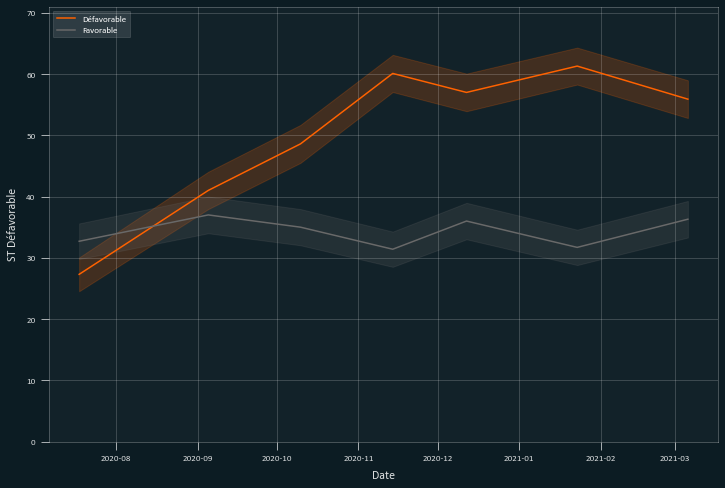

In [19]:


fig = plt.figure(figsize=(12,8))
# ax=sns.lineplot(data=taille_gauche_detail,x='Date',y='Base',hue='Groupe')

ax=sns.lineplot(data=data_pers,x='Date',y='ST Défavorable',label='Défavorable')
current_color=ax.get_lines()[0].get_color()
plt.fill_between(data_pers.Date, data_pers['ST Défavorable']-data_pers['Erreur défavorable'], data_pers['ST Défavorable']+data_pers['Erreur défavorable'],color=current_color, alpha=.2)

sns.lineplot(data=data_pers,x='Date',y='ST Favorable',label='Favorable')
current_color=ax.get_lines()[1].get_color()
plt.fill_between(data_pers.Date, data_pers['ST Favorable']-data_pers['Erreur favorable'], data_pers['ST Favorable']+data_pers['Erreur favorable'],color=current_color, alpha=.2)

# Organise date on ticks automatically
# fig.autofmt_xdate()
ax.set_ylim(0,int(np.max([data_pers['ST Favorable'].max(),data_pers['ST Défavorable'].max()]))+10)
plt.legend(loc='upper left')

# Analyse du dernier rapport

In [20]:
all_dates=np.sort(data_f.Date.unique())
most_recent=all_dates[-1]
scd_most_recent=all_dates[-2]

In [21]:
last_data=data_f[data_f.Date==data_f.Date.max()]
last_inex=pd.DataFrame()
last_inex['Résultats']=pd.concat([last_data['ST Favorable'],last_data['ST Défavorable']])
last_inex['Categorie']=pd.concat([last_data['Categorie'],last_data['Categorie']])
last_inex['Groupe']=pd.concat([last_data['Groupe'],last_data['Groupe']])
last_inex['Inexploitable']=pd.concat([last_data['Inexploitable Favorable'],last_data['Inexploitable Défavorable']])
last_inex['Nom']=pd.concat([last_data['Nom'],last_data['Nom']])
last_inex

,Résultats,Categorie,Groupe,Inexploitable,Nom
0,40.9,ENSEMBLE,ENSEMBLE,False,Emmanuel MACRON
1,42.9,Sexe,Homme,False,Emmanuel MACRON
2,39.2,Sexe,Femme,False,Emmanuel MACRON
3,47.0,Age,18à24ans,True,Emmanuel MACRON
4,40.2,Age,25à34ans,True,Emmanuel MACRON
...,...,...,...,...,...
2935,40.8,VotePrésidentielle20171ertour,STNonexpr,True,Laurent WAUQUIEZ
2936,65.7,VotePrésidentielle20172ndtour,EmmanuelMacron,True,Laurent WAUQUIEZ
2937,48.5,VotePrésidentielle20172ndtour,MarineLePen,True,Laurent WAUQUIEZ
2938,59.8,VotePrésidentielle20172ndtour,STExpr,True,Laurent WAUQUIEZ


## Inexploitables global

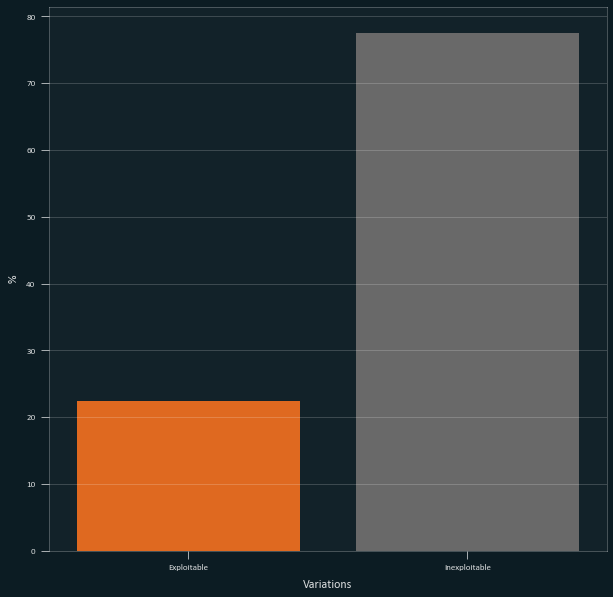

In [22]:
fig = plt.figure(figsize=(10,10))
ax=sns.barplot(x='Inexploitable', y='Inexploitable', data=last_inex, estimator=lambda x: len(x) / len(last_inex) * 100)
ax.set(ylabel="%")
ax.set(xlabel="Variations")
ax.set(xticklabels=['Exploitable', 'Inexploitable'])
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

fig.savefig('plot.png')

In [23]:
print(last_inex.Inexploitable.value_counts())
last_inex.Inexploitable.value_counts()/len(last_inex)

True     4560
False    1320
Name: Inexploitable, dtype: int64


True     0.77551
False    0.22449
Name: Inexploitable, dtype: float64

## Inexploitable par personnalité

### Inexploitable sur tout le jeu de données

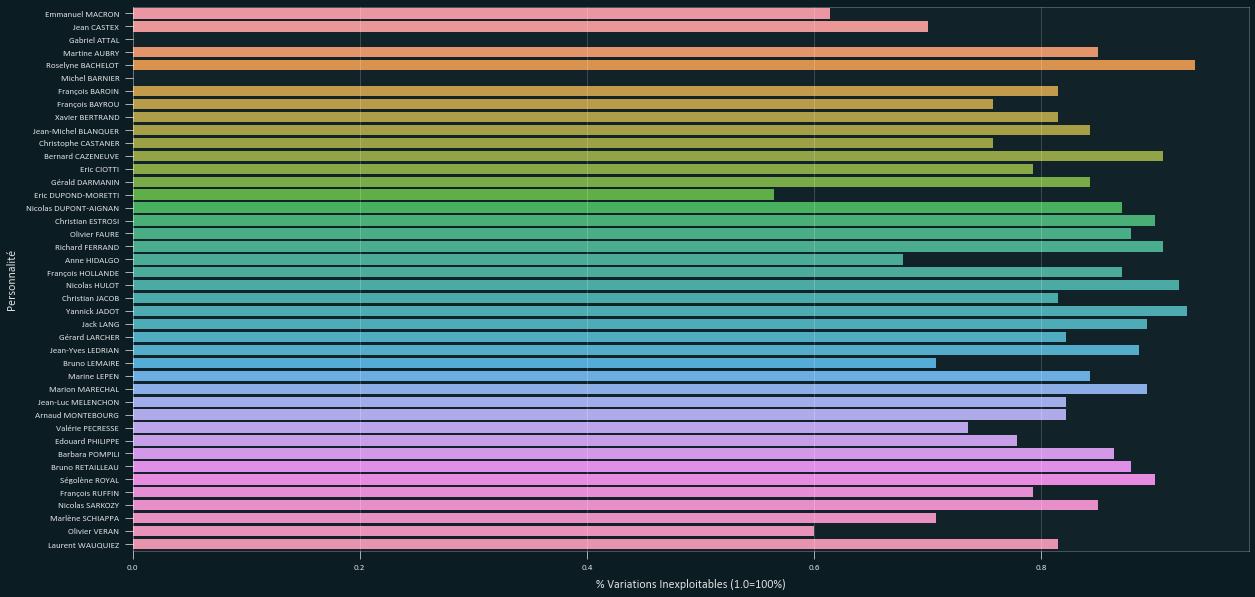

In [24]:
fig = plt.figure(figsize=(20,10))
ax=sns.barplot(x='Inexploitable',y='Nom',data=last_inex,ci=None
#  ,estimator=lambda x: len(x) / len(df_inex[df_inex.Categorie=='ENSEMBLE']) * 100
)
ax.set(xlabel="% Variations Inexploitables (1.0=100%)")
ax.set(ylabel="Personnalité ")
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

fig.savefig('plot.png')

In [25]:
print(last_inex['Inexploitable'].value_counts()/len(last_inex))
print(last_inex['Inexploitable'].value_counts())

True     0.77551
False    0.22449
Name: Inexploitable, dtype: float64
True     4560
False    1320
Name: Inexploitable, dtype: int64


### Inexploitable sur le groupe ENSEMBLE

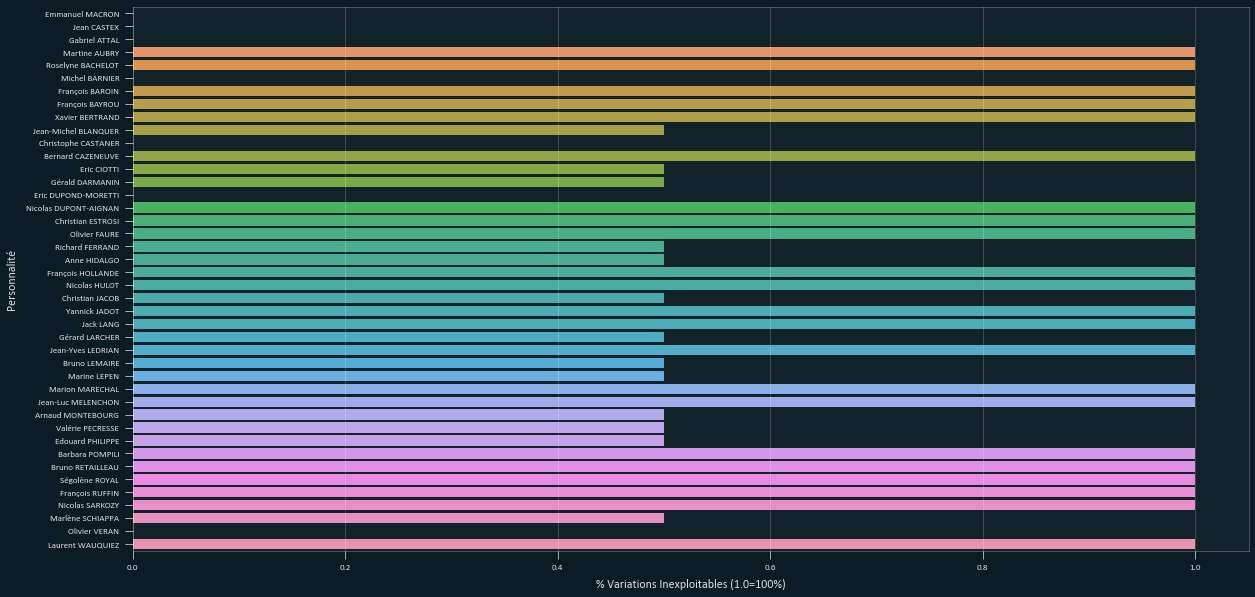

In [26]:
last_inex_ens=last_inex[last_inex.Categorie=='ENSEMBLE']
fig = plt.figure(figsize=(20,10))
ax=sns.barplot(x='Inexploitable',y='Nom',data=last_inex_ens,ci=None
#  ,estimator=lambda x: len(x) / len(df_inex[df_inex.Categorie=='ENSEMBLE']) * 100
)
ax.set(xlabel="% Variations Inexploitables (1.0=100%)")
ax.set(ylabel="Personnalité ")
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

fig.savefig('plot.png')

In [27]:
print(last_inex_ens['Inexploitable'].value_counts()/len(last_inex_ens))
print(last_inex_ens['Inexploitable'].value_counts())

True     0.678571
False    0.321429
Name: Inexploitable, dtype: float64
True     57
False    27
Name: Inexploitable, dtype: int64


In [28]:
nom='SCHIA'
categorie='Proximitépolitique'
last_inex[(last_inex.Nom.str.contains(nom))&(last_inex.Inexploitable==False)]

,Résultats,Categorie,Groupe,Inexploitable,Nom
2731,24.2,Sexe,Homme,False,Marlène SCHIAPPA
2736,23.7,Age,45à59ans,False,Marlène SCHIAPPA
2740,23.7,Age,ST35à59ans,False,Marlène SCHIAPPA
2747,20.6,PCSdelapersonnederéférencedufoyer,Ouvrier,False,Marlène SCHIAPPA
2749,25.0,PCSdelapersonnederéférencedufoyer,Inactif,False,Marlène SCHIAPPA
2760,27.5,Région,Nord-Est,False,Marlène SCHIAPPA
2763,23.8,Région,STProvince,False,Marlène SCHIAPPA
2766,23.6,Catégoried'agglomération,20.000à100.000hab,False,Marlène SCHIAPPA
2767,29.0,Catégoried'agglomération,Plusde100.000hab,False,Marlène SCHIAPPA
2769,18.0,Revenumensuelnetdufoyer,Moinsde1.200€,False,Marlène SCHIAPPA


In [29]:
last_inex.Categorie.unique()

array(['ENSEMBLE', 'Sexe', 'Age', 'PCSdelapersonnederéférencedufoyer',
       "PCSdel'individu", 'Région', "Catégoried'agglomération",
       'Revenumensuelnetdufoyer', 'Diplômeleplusélevé',
       'Proximitépolitique', 'VotePrésidentielle20171ertour',
       'VotePrésidentielle20172ndtour'], dtype=object)

## Variation d'une personnalité sur les deux derniers jeux de données

In [30]:
nom="Emmanuel MACRON"
short_d=data_f[(data_f.Nom==nom) & ((data_f.Date==most_recent) | (data_f.Date==scd_most_recent)) & (data_f.Groupe=='Rural')].sort_values(by='Date',ascending=True,ignore_index=True)
print('Favorable')
print((margin_p(short_d['ST Favorable']/100,short_d.Base)*100).T)
print('Défavorable')
print((margin_p(short_d['ST Défavorable']/100,short_d.Base)*100).T)
short_d

Favorable
[[28.05581435 40.34418565]
 [28.91821015 41.28178985]]
Défavorable
[[53.75747754 66.44252246]
 [50.38414749 63.21585251]]


,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable
0,Emmanuel MACRON,Catégoried'agglomération,Rural,229.0,8.0,26.2,34.2,33.2,26.9,60.1,5.7,2.8,-3.2,2021-01-23,True,True,6.144186,6.342522
1,Emmanuel MACRON,Catégoried'agglomération,Rural,229.0,4.8,30.3,35.1,34.0,22.8,56.8,8.1,0.9,-3.3,2021-03-06,True,True,6.181790,6.415853


In [31]:
data_f[(data_f.Nom==nom) & (data_f.Date==most_recent) & (data_f['Inexploitable Favorable']==False)]

,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable
0,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1000.0,8.1,32.9,40.9,28.2,24.5,52.7,6.4,5.8,-7.0,2021-03-06,False,False,3.047274,3.094510
1,Emmanuel MACRON,Sexe,Homme,476.0,10.3,32.6,42.9,29.6,25.1,54.7,2.5,5.7,-3.1,2021-03-06,False,True,4.446305,4.471934
2,Emmanuel MACRON,Sexe,Femme,524.0,6.0,33.2,39.2,26.8,24.0,50.9,9.9,6.0,-10.5,2021-03-06,False,False,4.180086,4.280456
5,Emmanuel MACRON,Age,35à44ans,140.0,6.3,34.0,40.3,25.7,25.4,51.1,8.6,10.3,-11.2,2021-03-06,False,False,8.125157,8.280507
6,Emmanuel MACRON,Age,45à59ans,296.0,8.7,30.9,39.6,28.9,26.5,55.4,4.9,11.8,-11.9,2021-03-06,False,False,5.571553,5.662817
10,Emmanuel MACRON,Age,ST35à59ans,436.0,8.0,31.9,39.8,27.9,26.2,54.1,6.1,11.3,-11.6,2021-03-06,False,False,4.594652,4.677543
14,Emmanuel MACRON,PCSdelapersonnederéférencedufoyer,Cadresupérieur,123.0,12.8,43.7,56.5,20.3,18.8,39.1,4.4,16.1,-11.4,2021-03-06,False,False,8.761377,8.623837
16,Emmanuel MACRON,PCSdelapersonnederéférencedufoyer,Employé,172.0,5.2,33.1,38.3,29.1,23.6,52.7,9.1,11.8,-15.9,2021-03-06,False,False,7.264970,7.461527
20,Emmanuel MACRON,PCSdel'individu,Agriculteurexploitant,10.0,23.5,52.9,76.4,15.7,8.0,23.6,0.0,40.6,-27.2,2021-03-06,False,True,26.318356,26.318356
24,Emmanuel MACRON,PCSdel'individu,Employé,175.0,4.7,36.9,41.6,26.0,23.4,49.4,8.9,14.5,-17.6,2021-03-06,False,False,7.302812,7.407570


# Dernière variation observable

In [32]:


def find_last_var(df):
    last_var={}
    for nom in df.Nom.unique():
        last_var[nom]={'fav':None,'defav':None,'date_fav':None,'date_defav':None}
        df_var=df[(df.Nom==nom) & (df.Categorie=='ENSEMBLE')]
        df_var=df_var.sort_values(by='Date',ascending=False,ignore_index=True)
        l_base=df_var.iloc[0].Base
        l_fav=df_var.iloc[0]['ST Favorable']
        l_defav=df_var.iloc[0]['ST Défavorable']
        er_l_fav=error_p(l_fav/100,l_base)*100
        er_l_defav=error_p(l_defav/100,l_base)*100
        for i in range(1,len(df_var)):
            t=df_var.iloc[i]
            t_base=t.Base
            t_fav=t['ST Favorable']
            t_defav=t['ST Défavorable']
            er_t_fav=error_p(t_fav/100,t_base)*100
            er_t_defav=error_p(t_defav/100,t_base)*100
            # print(l_fav,er_l_fav,t_fav,er_t_fav)
            if l_fav+er_l_fav < t_fav-er_t_fav and last_var[nom]['fav']==None:
                last_var[nom]['fav']= t_fav-er_t_fav-(l_fav+er_l_fav)
                last_var[nom]['date_fav']= t.Date                
            elif l_fav-er_l_fav > t_fav+er_t_fav and last_var[nom]['fav']==None:
                last_var[nom]['fav']= l_fav+er_l_fav-(t_fav-er_t_fav)
                last_var[nom]['date_fav']= t.Date                
            if l_defav+er_l_defav < t_defav-er_t_defav and last_var[nom]['defav']==None:
                last_var[nom]['defav']= t_defav-er_t_defav-(l_defav+er_l_defav)
                last_var[nom]['date_defav']= t.Date                
            elif l_defav-er_l_defav > t_defav+er_t_defav and last_var[nom]['defav']==None:
                last_var[nom]['defav']= l_defav+er_l_defav-(t_defav-er_t_defav)
                last_var[nom]['date_defav']= t.Date                
    return last_var

In [33]:
nom='Emmanuel MACRON'
last_var=find_last_var(data_f)
last_var[nom] 

{'fav': 18.146713660608288,
 'defav': 0.8653343450534905,
 'date_fav': Timestamp('2019-12-14 00:00:00'),
 'date_defav': Timestamp('2021-01-23 00:00:00')}

In [34]:
def find_last_var_usable(df):
    cols=['Nom','VarFav','DateFav','VarDefav','DateDefav']
    last_var=pd.DataFrame(columns=cols)
    for nom in df.Nom.unique():   
        t_uple=[nom]
        c_df=df.loc[(df.Nom==nom) & (df['Inexploitable Favorable']==False) & (df['Evolution ST Favorable']!=0)].sort_values(by=['Date'],ascending=False)
        if not c_df.empty:
            dernier_val=c_df.iloc[0]
            t_uple.append(dernier_val['Evolution ST Favorable'])
            t_uple.append(dernier_val['Date'])
        else:
            t_uple.extend([np.nan,np.nan])
            
        c_df=df.loc[(df.Nom==nom) & (df['Inexploitable Défavorable']==False) & (df['Evolution ST Défavorable']!=0)].sort_values(by=['Date'],ascending=False)
        if not c_df.empty:
            dernier_val=c_df.iloc[0]
            t_uple.append(dernier_val['Evolution ST Défavorable'])
            t_uple.append(dernier_val['Date'])
        else:
            t_uple.extend([np.nan,np.nan])
        last_var=last_var.append(pd.Series(t_uple, index=cols),ignore_index=True)
    return last_var


In [35]:
find_last_var_usable(data_f[data_f.Categorie=='ENSEMBLE'])

,Nom,VarFav,DateFav,VarDefav,DateDefav
0,Edouard PHILIPPE,-5.5,2021-01-23,-5.0,2021-03-06 00:00:00
1,Martine AUBRY,-3.5,2020-05-30,-3.8,2020-07-18 00:00:00
2,François BAROIN,3.8,2019-10-12,-4.3,2020-11-14 00:00:00
3,François BAYROU,-3.8,2019-12-14,-3.7,2020-12-12 00:00:00
4,Xavier BERTRAND,5.9,2020-03-20,-3.8,2020-11-14 00:00:00
5,Jean-Michel BLANQUER,-3.6,2021-01-23,-4.0,2021-03-06 00:00:00
6,Agnès BUZYN,-4.8,2020-04-24,8.0,2020-03-20 00:00:00
7,Christophe CASTANER,3.5,2021-03-06,-4.7,2021-03-06 00:00:00
8,Eric CIOTTI,3.5,2020-03-20,-4.7,2021-03-06 00:00:00
9,Gérald DARMANIN,3.7,2020-09-05,4.6,2020-12-12 00:00:00


## Verification pas de données bizarre

In [36]:
data_f[data_f.Base==0]



,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable
12,Edouard PHILIPPE,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
82,Martine AUBRY,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
152,François BAROIN,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
222,François BAYROU,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
292,Xavier BERTRAND,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
362,Jean-Michel BLANQUER,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
432,Agnès BUZYN,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
502,Christophe CASTANER,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
572,Eric CIOTTI,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
642,Gérald DARMANIN,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN


In [37]:
favUnmatch=data_f[np.abs(data_f['Très favorable']+data_f['Plutôt favorable']-data_f['ST Favorable'])>0.11]
favUnmatch

,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable
188,François BAROIN,Proximitépolitique,EELV,66.0,3.5,11.9,11.9,39.0,21.6,60.6,27.5,2.0,11.3,2018-12-08,True,True,7.811700,11.788771
194,François BAROIN,Proximitépolitique,RN,122.0,0.7,20.7,21.6,26.6,24.4,51.0,27.4,10.4,-4.2,2018-12-08,False,True,7.302323,8.870728
200,François BAROIN,VotePrésidentielle20171ertour,B. Hamon,47.0,0.0,13.3,16.7,34.4,26.5,61.0,22.3,0.4,1.9,2018-12-08,True,True,10.663208,13.944545
257,François BAYROU,Proximitépolitique,PS,101.0,7.5,37.2,39.2,37.4,16.3,53.6,7.1,-2.3,5.4,2018-12-08,True,True,9.521168,9.726056
258,François BAYROU,Proximitépolitique,EELV,66.0,0.9,37.6,37.6,36.3,14.3,50.6,11.7,-6.2,5.7,2018-12-08,True,True,11.686119,12.062098
259,François BAYROU,Proximitépolitique,LREM,84.0,2.6,47.9,50.3,35.3,7.5,42.8,6.8,5.1,-5.6,2018-12-08,True,True,10.692484,10.581234
260,François BAYROU,Proximitépolitique,MoDem,41.0,0.8,69.0,81.1,15.7,3.2,18.9,0.0,4.6,0.4,2018-12-08,True,True,11.984101,11.984101
261,François BAYROU,Proximitépolitique,UDI,20.0,5.6,24.1,24.1,58.7,13.0,71.7,4.1,4.7,-6.8,2018-12-08,True,True,18.744354,19.742124
263,François BAYROU,Proximitépolitique,DLF,43.0,0.6,12.3,19.8,43.7,26.7,70.4,9.8,4.8,-13.1,2018-12-08,True,True,11.910819,13.644387
264,François BAYROU,Proximitépolitique,RN,122.0,3.9,16.8,17.7,45.7,28.3,74.0,8.3,2.7,2.2,2018-12-08,True,True,6.772714,7.783567


In [38]:
defavUnmatch=data_f[np.abs(data_f['Très défavorable']+data_f['Plutôt défavorable']-data_f['ST Défavorable'])>0.11]
defavUnmatch

,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable
2442,Jean-Luc MELENCHON,VotePrésidentielle20171ertour,F.Fillon,147.0,8.3,8.3,16.6,0.0,74.7,91.3,0.4,3.8,-3.0,2018-12-08,True,True,6.014984,4.556091


In [39]:
unmatch=data_f[np.abs(data_f['ST Favorable']+data_f['ST Défavorable']+data_f['Nsp'])<99.89]
unmatch



,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable
12,Edouard PHILIPPE,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
46,Edouard PHILIPPE,Proximitépolitique,ST FI PdG PC,101.0,0.0,2.4,2.4,36.6,57.3,93.9,0.0,-5.7,10.0,2018-12-08,False,False,2.984873,4.667594
82,Martine AUBRY,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
152,François BAROIN,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
222,François BAYROU,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
292,Xavier BERTRAND,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
362,Jean-Michel BLANQUER,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
432,Agnès BUZYN,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
502,Christophe CASTANER,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN
572,Eric CIOTTI,PCSdelapersonnederéférencedufoyer,Agriculteur exploitant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-08,False,False,NaN,NaN


In [40]:
dates=np.sort(data_f.Date.unique())
last_date=dates[len(dates)-1]
prev_date=dates[len(dates)-2]
l_data=data_f[data_f.Date==last_date]
p_data=data_f[data_f.Date==prev_date]
l_noms=np.sort(l_data.Nom.unique())
p_noms=np.sort(p_data.Nom.unique())


for nom in l_noms:
    if nom in p_noms:
        lastd=l_data[l_data.Nom==nom]
        prevd=p_data[p_data.Nom==nom]
        lastd['Prev_calc']=lastd['ST Favorable']-lastd['Evolution ST Favorable']
        # check_cond=(l_data.Nom==p_data.Nom) & (l_data.Categorie==p_data.Categorie) & (l_data.Groupe==p_data.Groupe)
        lastd['Prev']= prevd['ST Favorable']
        weird=lastd[np.abs(lastd['Prev'] - lastd['Prev_calc'])> 0.11]
        if len(weird)>0:
            weird
        else:
            print('{} is clear'.format(nom))


ipykernel_launcher:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Anne HIDALGO is clear
Arnaud MONTEBOURG is clear
Barbara POMPILI is clear
Bernard CAZENEUVE is clear
Bruno LEMAIRE is clear
Bruno RETAILLEAU is clear
Christian ESTROSI is clear
Christian JACOB is clear
Christophe CASTANER is clear
Edouard PHILIPPE is clear
Emmanuel MACRON is clear
Eric CIOTTI is clear
Eric DUPOND-MORETTI is clear
François BAROIN is clear
François BAYROU is cl

In [41]:
for i in weird.index:
    print(p_data.loc[i ])

In [42]:
last_data

,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable
0,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1000.0,8.1,32.9,40.9,28.2,24.5,52.7,6.4,5.8,-7.0,2021-03-06,False,False,3.047274,3.094510
1,Emmanuel MACRON,Sexe,Homme,476.0,10.3,32.6,42.9,29.6,25.1,54.7,2.5,5.7,-3.1,2021-03-06,False,True,4.446305,4.471934
2,Emmanuel MACRON,Sexe,Femme,524.0,6.0,33.2,39.2,26.8,24.0,50.9,9.9,6.0,-10.5,2021-03-06,False,False,4.180086,4.280456
3,Emmanuel MACRON,Age,18à24ans,106.0,13.0,34.1,47.0,23.1,19.6,42.8,10.2,1.7,-2.5,2021-03-06,True,True,9.501453,9.419396
4,Emmanuel MACRON,Age,25à34ans,159.0,10.9,29.3,40.2,25.9,23.1,49.0,10.8,3.1,-8.9,2021-03-06,True,True,7.621161,7.770351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,Laurent WAUQUIEZ,VotePrésidentielle20171ertour,STNonexpr,252.0,0.5,13.4,13.9,21.5,19.3,40.8,45.3,2.0,-2.6,2021-03-06,True,True,4.271346,6.068016
2936,Laurent WAUQUIEZ,VotePrésidentielle20172ndtour,EmmanuelMacron,416.0,2.6,11.1,13.7,35.9,29.8,65.7,20.6,-7.4,4.1,2021-03-06,False,True,3.304267,4.561831
2937,Laurent WAUQUIEZ,VotePrésidentielle20172ndtour,MarineLePen,214.0,4.0,25.9,29.9,28.5,20.0,48.5,21.6,3.0,0.5,2021-03-06,True,True,6.134000,6.696127
2938,Laurent WAUQUIEZ,VotePrésidentielle20172ndtour,STExpr,630.0,3.1,16.1,19.2,33.4,26.5,59.8,21.0,-3.9,2.9,2021-03-06,False,True,3.075687,3.828683


# Variation des paramètres non critères pour les quotas

In [43]:
data_f.Categorie.unique()

array(['ENSEMBLE', 'Sexe', 'Age', 'PCSdelapersonnederéférencedufoyer',
       "PCSdel'individu", 'Région', "Catégoried'agglomération",
       'Revenumensuelnetdufoyer', "Niveaud'études", 'Proximitépolitique',
       'VotePrésidentielle20171ertour', 'VotePrésidentielle20172ndtour',
       'Diplômeleplusélevé'], dtype=object)

In [44]:
data_f[data_f.Categorie=='Proximitépolitique'].Groupe.value_counts()

DLF                              558
RN                               558
EELV                             558
PS                               558
LR                               558
MoDem                            558
LREM                             558
UDI                              558
Aucunparti                       528
STFIPdGPC                        528
STCentre(ModemLREM)              528
STDroite(LRUDI)                  528
STGauche(FIPdGPCPSEELV)          528
Aucun parti                       30
ST Droite (LR UDI)                30
ST FI PdG PC                      30
ST Centre (Modem LREM)            30
ST Gauche (FI PdG PC PS EELV)     30
Name: Groupe, dtype: int64

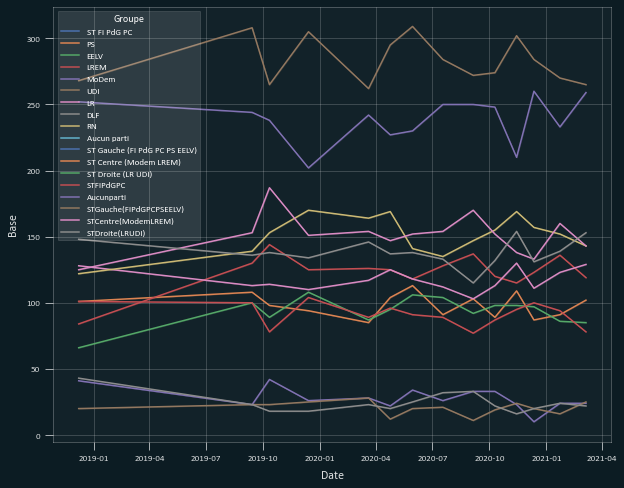

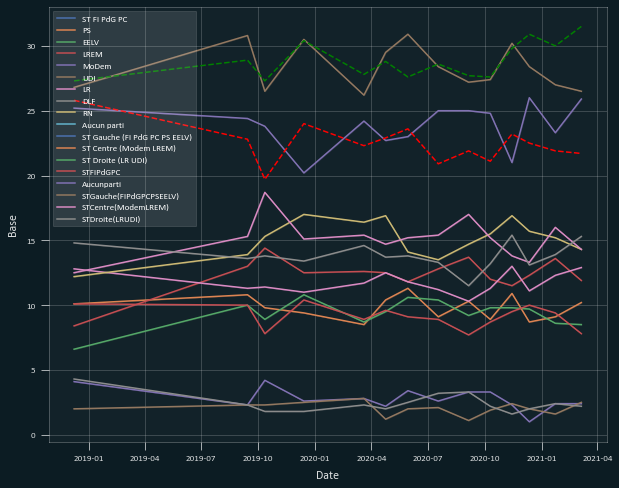

In [45]:
plt.figure(figsize=(10,8))
df_plot=data_f[data_f.Categorie=="Proximitépolitique"]
# df_plot=df_plot[df_plot.Groupe.isin(['STFIPdGPC','PS',"EELV",'LREM','MoDem','UDI','LR','DLF','RN','Aucunparti'])]
sns.lineplot(x='Date',y=df_plot.Base,data=df_plot,hue='Groupe', palette="deep")
plt.figure(figsize=(10,8))
sns.lineplot(x='Date',y=df_plot.Base/10,data=df_plot,hue='Groupe', palette="deep")
sns.lineplot(x='Date',y='ST Favorable',data=data_f[(data_f.Categorie=='ENSEMBLE') & (data_f.Nom=='Jean-Luc MELENCHON')],color='red',linestyle='--')
sns.lineplot(x='Date',y='ST Favorable',data=data_f[(data_f.Categorie=='ENSEMBLE') & (data_f.Nom=='Marine LEPEN')],color='green',linestyle='--')

In [46]:
data_f[data_f.Categorie=="PCSdel'individu"].Groupe.unique()

array(['Agriculteur exploitant', 'Profession indépendante',
       'Cadre supérieur', 'Profession intermédiaire', 'Employé',
       'Ouvrier', 'Retraité', 'Inactif', 'Agriculteurexploitant',
       'Professionindépendante', 'Cadresupérieur',
       'Professionintermédiaire'], dtype=object)

In [47]:
data_f.Categorie.unique()

array(['ENSEMBLE', 'Sexe', 'Age', 'PCSdelapersonnederéférencedufoyer',
       "PCSdel'individu", 'Région', "Catégoried'agglomération",
       'Revenumensuelnetdufoyer', "Niveaud'études", 'Proximitépolitique',
       'VotePrésidentielle20171ertour', 'VotePrésidentielle20172ndtour',
       'Diplômeleplusélevé'], dtype=object)